# Data scientists salary survey

## Data cleaning

In [0]:
# import libraries
import pandas as pd
import numpy as np
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [0]:
# read csv into a dataset
dataset = pd.read_csv('Kaggle_Salary.csv', low_memory=False)

In [0]:
# print the first 10 rows of the dataset
dataset.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


In [0]:
# read all the titles, we want to know the meaning of each question
dataset.iloc[0]
# it can be seen that some data are useless (for example: Time duration) or in a bad format (for exmample: some question followed
# by other text and got -1) and some questions are multiple choice question, which means whithout the option provided, you cannot
# provide other answers, so that only the option are shown and others in that column are NaN

Unnamed: 0                                                                             0
Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT        

### drop colunms that not in the questionnair

In [0]:
# clean the useless data in the dataset
dataset_new = dataset.drop(dataset.index[0])

In [0]:
# drop the unnamed index column that added in the csv
dataset_new = dataset_new.drop(dataset_new.columns[0], axis=1)

In [0]:
# reset the index order
dataset_new2 = dataset_new.reset_index()

In [0]:
# drop the column that generated after the reset step
dataset_new3 = dataset_new2.drop('level_0', 1)

In [0]:
# drop the 'index' column that is irrelated to the features
dataset_new4 = dataset_new3.drop('index', 1)

In [0]:
dataset_new4.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
3,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
4,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [0]:
# drop the 'Time from Start to Finish (seconds)' column that is irrelated to the features
dataset_new5 = dataset_new4.drop('Time from Start to Finish (seconds)', 1)

### drop the bad format columns

In [0]:
# delete all the 'Qn_OTHER_PART' column because it is useless
dataset_new6 = dataset_new5[dataset_new5.columns.drop(list(dataset_new5.filter(regex='TEXT')))]

In [0]:
# delete all the 'Qn_OTHER' column because it is useless
dataset_new7 = dataset_new6[dataset_new6.columns.drop(list(dataset_new6.filter(regex='OTHER')))]

In [0]:
dataset_new7.head() # entire dataset without all useless features

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
0,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,I do not know,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,I do not know,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
3,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN


### analyse the percentage of null values in each column

In [0]:
#analyse the number of null values in each column
#null = dataset_USA.isnull().sum(axis=0)
missing = pd.DataFrame(dataset_new7.isnull().sum())
missing.columns = ['count']
missing['missing_percentage'] = round((missing['count']/dataset_new7.shape[0])*100,0)
missing
#we can see there are some columns that have very large null proportion

,count,missing_percentage
Q1,0,0.0
Q2,0,0.0
Q3,0,0.0
Q4,0,0.0
Q5,135,1.0
Q6,0,0.0
Q7,0,0.0
Q8,76,0.0
Q9,0,0.0
Q10,292,2.0


### drop the column with high percentage

In [0]:
# be carefull to select the high percentage column to drop because there are some multiple choice columns
# most of the high percentage columns are 'other' and 'I don't know' which are useless answers/features
# therefore, after going back to the survey to analyse, I decide the cutoff being 96% (included)
missing_boolean = missing.missing_percentage <= 96

In [0]:
missing_boolean.value_counts(normalize=False, sort=True) # there are 233 features left because they have no more than 96% NaNs

True     233
False    126
Name: missing_percentage, dtype: int64

In [0]:
dataset_new8 = dataset_new7[dataset_new7.columns[missing_boolean]] # select the columns with 'True' in the dataset
dataset_new8.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,I do not know,...,NaN,Include a text file describing all dependencies,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,I do not know,...,Define relative rather than absolute file paths,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN
3,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,NaN,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,"We recently started using ML methods (i.e., mo...",...,Define relative rather than absolute file paths,NaN,NaN,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN


In [0]:
dataset_new8.shape # dataset_USA6 contain all the features, it is the entire dataset

(15429, 233)

In [0]:
'Q13_Part_15' in dataset_new8.columns # check the results after excluding features

True

### separate the questions that contain several parts

In [0]:
#we can see that there are some parts in one question because this is a multiple choices question
#and the value in each part of the question is the same, which is the option given in the question's title
#we filter out these multiple choices questions and fill the same answer into 1
#then in order to be attached to the entire feature dataframe later on
df_new = dataset_new8[dataset_new8.columns.drop(list(dataset_new8.filter(regex='Part')))]

In [0]:
df_new.head() #df_new = dataset_USA6 - multiple choices features

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,Q32,Q37,Q40,Q43,Q46,Q48
0,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Definitely not,NaN,NaN,Independent projects are equally important as ...,NaN,NaN,NaN
1,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,I do not know,...,75% to 99% of my time,5-10 years,< 1 year,Definitely yes,Time Series Data,DataCamp,Independent projects are equally important as ...,0-10,10-20,I am confident that I can explain the outputs ...
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,I do not know,...,75% to 99% of my time,5-10 years,2-3 years,Maybe,NaN,Coursera,Independent projects are slightly more importa...,20-30,20-30,I am confident that I can understand and expla...
3,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,25% to 49% of my time,< 1 year,< 1 year,Probably not,Numerical Data,NaN,Independent projects are much more important t...,0-10,0,I do not know; I have no opinion on the matter
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,"We recently started using ML methods (i.e., mo...",...,75% to 99% of my time,< 1 year,< 1 year,Probably not,Image Data,Udacity,Independent projects are slightly more importa...,0,10-20,"I view ML models as ""black boxes"" but I am con..."


### dealing with normal binary multiple choices
- first, fill the NAs with zeros
- second, change all the string to 1

In [0]:
df_part = dataset_new8.filter(like='Part',axis=1) #all the multiple choices features

In [0]:
df_part.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Include a text file describing all dependencies,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,RStudio,NaN,...,Define relative rather than absolute file paths,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,RStudio,NaN,...,NaN,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN
4,NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,Jupyter/IPython,NaN,PyCharm,...,Define relative rather than absolute file paths,NaN,NaN,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN


In [0]:
#there are some special multiple choices questions (Q34,35,39,41), we need to extract them out to treat differently
#Q34 and Q35 are special because they contain lots of different integer, we can't just convert all of them to 1
#Q39 and Q41 are special because they are the multiple choices but contains different answers in the question column
#they are called the special questions
#filter these questions, the left are normal binary questions
df_part_normal = df_part[df_part.columns.drop(list(df_part.filter(regex='Q34')))]

In [0]:
df_part_normal = df_part_normal[df_part_normal.columns.drop(list(df_part_normal.filter(regex='Q35')))]

In [0]:
df_part_normal = df_part_normal[df_part_normal.columns.drop(list(df_part_normal.filter(regex='Q39')))]

In [0]:
df_part_normal_final = df_part_normal[df_part_normal.columns.drop(list(df_part_normal.filter(regex='Q41')))]

In [0]:
#how many rows and how many columns
df_part_normal_final.shape

(15429, 191)

In [0]:
#after filter out those special questions, the rest of dataset now are all multiple choices
#there are only two types in each column - same string answer and NaN
#we should change the same answer to 1 and NaN to 0
df_part_normal_final = df_part_normal_final.fillna(0) #fill NANs with zeros

In [0]:
df_part_normal_final.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,0,0,0,0,0,None of these activities are an important part...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Analyze and understand data to influence produ...,0,0,0,0,0,0,0,0,0,...,0,Include a text file describing all dependencies,0,0,Too time-consuming,0,0,0,0,0
2,0,0,0,0,0,0,Other,0,RStudio,0,...,Define relative rather than absolute file paths,0,0,0,Too time-consuming,0,0,Not enough incentives to share my work,0,0
3,0,0,0,0,0,None of these activities are an important part...,0,0,RStudio,0,...,0,0,0,Too expensive,0,0,0,0,I had never considered making my work easier f...,0
4,0,Build and/or run a machine learning service th...,0,0,0,0,0,Jupyter/IPython,0,PyCharm,...,Define relative rather than absolute file paths,0,0,0,0,0,0,Not enough incentives to share my work,0,0


In [0]:
df_copy=df_part_normal_final.copy()
for name in list(df_copy):
    df_part_normal_final[name]=df_copy[name][:].apply(lambda x:0 if x==0 else 1)

df_part_normal_final.head() # change all the 'yes' answer to multiple choice question to 1

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


### separate two special multiple choices with numbers

In [0]:
df_part_Q34 = dataset_new8.filter(like='Q34',axis=1) #the Q34 special multiple choices feature
df_part_Q35 = dataset_new8.filter(like='Q35',axis=1) #the Q35 special multiple choices feature
df_part_Q34 = df_part_Q34.fillna(0) #fill NaNs in these two special with 0
df_part_Q35 = df_part_Q35.fillna(0)

### dealing with special multiple choices
- first, fill the NAs with mode in each columns
- second, change to categories, assign the numerical values

In [0]:
df_part_Q39 = dataset_new8.filter(like='Q39',axis=1) #the Q39 special multiple choices feature
df_part_Q41 = dataset_new8.filter(like='Q41',axis=1) #the Q41 special multiple choices feature

In [0]:
#use the mode filling method to fill NaNs
df_part_Q39_copy = df_part_Q39.copy()
for name in list(df_part_Q39_copy):
    df_part_Q39[name] = df_part_Q39_copy[name].fillna(df_part_Q39_copy[name].mode()[0])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
#use the mode filling method to fill NaNs
df_part_Q41_copy = df_part_Q41.copy()
for name in list(df_part_Q41_copy):
    df_part_Q41[name] = df_part_Q41_copy[name].fillna(df_part_Q41_copy[name].mode()[0])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
#encoding
df_part_Q39_category = pd.get_dummies(df_part_Q39, columns=['Q39_Part_1','Q39_Part_2'],prefix=['Q39_Part1', 'Q39_Part2'])

In [0]:
df_part_Q39_category.head()

,Q39_Part1_Much better,Q39_Part1_Much worse,Q39_Part1_Neither better nor worse,Q39_Part1_No opinion; I do not know,Q39_Part1_Slightly better,Q39_Part1_Slightly worse,Q39_Part2_Much better,Q39_Part2_Much worse,Q39_Part2_Neither better nor worse,Q39_Part2_No opinion; I do not know,Q39_Part2_Slightly better,Q39_Part2_Slightly worse
0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0


In [0]:
#encoding
df_part_Q41_category = pd.get_dummies(df_part_Q41, columns=['Q41_Part_1','Q41_Part_2','Q41_Part_3'],prefix=['Q41_Part1', 'Q41_Part2','Q41_Part3'])

In [0]:
df_part_Q41_category.head()

,Q41_Part1_No opinion; I do not know,Q41_Part1_Not at all important,Q41_Part1_Slightly important,Q41_Part1_Very important,Q41_Part2_No opinion; I do not know,Q41_Part2_Not at all important,Q41_Part2_Slightly important,Q41_Part2_Very important,Q41_Part3_No opinion; I do not know,Q41_Part3_Not at all important,Q41_Part3_Slightly important,Q41_Part3_Very important
0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,1


### dealing with non-multiple choices question
- first, fill all the NAs with mode in each column
- second, change the entire dataframe to categories

In [0]:
#analyse df_new, mode filling
for name in list(df_new):
    df_new[name] = df_new[name].fillna(df_new[name].mode()[0])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_new.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,Q32,Q37,Q40,Q43,Q46,Q48
0,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,Definitely not,Numerical Data,Coursera,Independent projects are equally important as ...,0,10-20,I am confident that I can understand and expla...
1,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,I do not know,...,75% to 99% of my time,5-10 years,< 1 year,Definitely yes,Time Series Data,DataCamp,Independent projects are equally important as ...,0-10,10-20,I am confident that I can explain the outputs ...
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,I do not know,...,75% to 99% of my time,5-10 years,2-3 years,Maybe,Numerical Data,Coursera,Independent projects are slightly more importa...,20-30,20-30,I am confident that I can understand and expla...
3,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,25% to 49% of my time,< 1 year,< 1 year,Probably not,Numerical Data,Coursera,Independent projects are much more important t...,0-10,0,I do not know; I have no opinion on the matter
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,"We recently started using ML methods (i.e., mo...",...,75% to 99% of my time,< 1 year,< 1 year,Probably not,Image Data,Udacity,Independent projects are slightly more importa...,0,10-20,"I view ML models as ""black boxes"" but I am con..."


In [0]:
# can check and make sure that there is no null value left
df_new.isnull().sum()

Q1                     0
Q2                     0
Q3                     0
Q4                     0
Q5                     0
Q6                     0
Q7                     0
Q8                     0
Q9                     0
Q10                    0
Q12_MULTIPLE_CHOICE    0
Q17                    0
Q18                    0
Q20                    0
Q22                    0
Q23                    0
Q24                    0
Q25                    0
Q26                    0
Q32                    0
Q37                    0
Q40                    0
Q43                    0
Q46                    0
Q48                    0
dtype: int64

In [0]:
df_new.to_csv('out.csv', sep=',',index = False) #you can see the cleaned data

In [0]:
# encoding
# do not include Q9 because Q9 is the target column
df_new_category = pd.get_dummies(df_new, columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q10'
                                                ,'Q12_MULTIPLE_CHOICE','Q17','Q18','Q20'
                                                ,'Q22','Q23','Q24','Q25','Q26','Q32','Q37','Q40'
                                                ,'Q43','Q46','Q48'])

In [0]:
df_new_category.head()

,Q9,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q46_50-60,Q46_60-70,Q46_70-80,Q46_80-90,Q46_90-100,Q48_I am confident that I can explain the outputs of most if not all ML models,Q48_I am confident that I can understand and explain the outputs of many but not all ML models,Q48_I do not know; I have no opinion on the matter,"Q48_I view ML models as ""black boxes"" but I am confident that experts are able to explain model outputs","Q48_Yes, most ML models are ""black boxes"""
0,18668,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2726,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,682,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11957,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2696,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
df_new_category.shape

(15429, 305)

### combine all the cleaned category data sets together

In [0]:
#now I have several cleaned dataset
#first, df_new_category
#second, df_part_Q39_category and df_part_Q41_category
#third, df_part_Q34 and df_part_Q35
#fianlly, df_part_normal_final
emerge1 = df_new_category.join(df_part_Q39_category)
emerge2 = emerge1.join(df_part_Q41_category)
emerge3 = emerge2.join(df_part_Q34)
emerge4 = emerge3.join(df_part_Q35)
emerge = emerge4.join(df_part_normal_final)

In [0]:
emerge.head()

,Q9,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,18668,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2726,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,682,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,11957,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,2696,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [0]:
emerge_new = emerge.copy()
emerge_new['Q9']= emerge['Q9'].astype(str).astype(int) #change the target column from strinf type to integer type

In [0]:
emerge_x = emerge_new.drop('Q9', 1) #separate target column and others, which are y and x, respectively

In [0]:
target_y = emerge_new[['Q9']] #in order to do the split data later

In [0]:
emerge_x.head() #that is the final data before feature selection

,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,...,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [0]:
target_y.head() #the target column

,Q9
0,18668
1,2726
2,682
3,11957
4,2696


## Exploratory data analysis - part 1

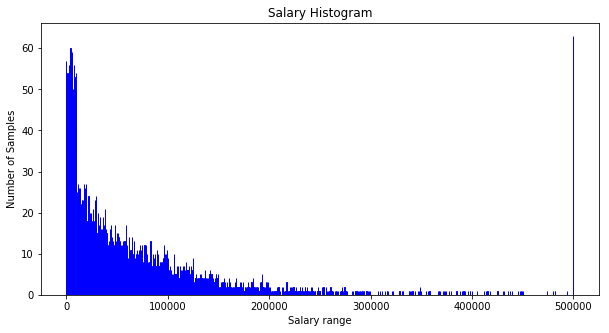

In [0]:
#the first basic trend plot
%matplotlib inline
plt.figure(figsize=(10,5))
plt.hist(df_new['Q9'].astype(str).astype(int), bins=5000, edgecolor='blue')
plt.title('Salary Histogram')
plt.xlabel('Salary range')
plt.ylabel('Number of Samples')
plt.show()

We can see that most people get a salary from [0,10000], there are fewer people when the salary increase
There are some influential data that the salary is greater than 500000, which are unusual

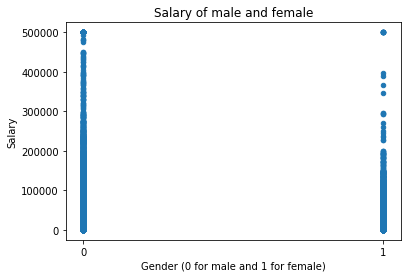

In [0]:
#the second plot, we compare salary (Q9) with different gender (Q1)
emerge=emerge.astype(float) #change each element to numeric data
plt.figure(figsize=(10,5))
emerge.plot.scatter(x='Q1_Female',y='Q9')
plt.title('Salary of male and female')
plt.xlabel('Gender (0 for male and 1 for female)')
plt.ylabel('Salary')
plt.xticks([0,1]) #change the x axis to only 0 and 1
#plt.legend()
plt.show()

We can see that the salary of male are evenly distributed
Female get a lower salary compared to male and less high-level salary

In [0]:
#the third plot, we compare acadamic backgroud (Q4) with different gender (Q1)
df = df_new[['Q1','Q4','Q2']].groupby(['Q1','Q4']).agg(['count'])
df

Q2
                                                                           count
Q1                      Q4                                                      
Female                  Bachelor’s degree                                    545
                        Doctoral degree                                      452
                        I prefer not to answer                                12
                        Master’s degree                                     1259
                        No formal education past high school                   9
                        Professional degree                                   49
                        Some college/university study without earning a...    54
Male                    Bachelor’s degree                                   3794
                        Doctoral degree                                     2043
                        I prefer not to answer                               103
                        Master’s degree                                     5951
                        No formal education past high school                 117
                        Professional degree                                  330
                        Some college/university study without earning a...   528
Prefer not to say       Bachelor’s degree                                     30
                        Doctoral degree                                       19
                        I prefer not to answer                                12
                        Master’s degree                                       51
                        No formal education past high school                   7
                        Professional degree                                    4
                        Some college/university study without earning a...     7
Prefer to self-describe Bachelor’s degree                                     14
                        Doctoral degree                                        8
                        I prefer not to answer                                 3
                        Master’s degree                                       25
                        No formal education past high school                   2
                        Professional degree                                    1

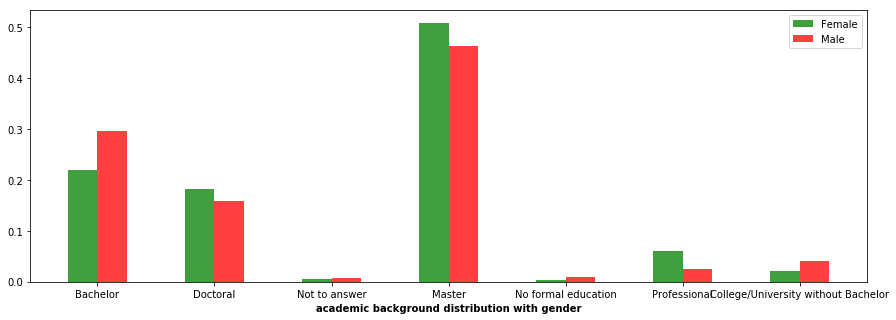

In [0]:
#now show the grouped data into grouped bar chart
#set width of bar
barWidth = 0.25
opacity = 0.75
#set height of bar
bars1 = [545/2480, 452/2480, 12/2480, 1259/2480, 9/2480, 149/2480, 54/2480] #positive
bars2 = [3794/12866, 2043/12866, 103/12866, 5951/12866, 117/12866, 330/12866, 528/12866] #negative
 
#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
#make the plot
plt.figure(figsize=(15,5))
plt.bar(r1, bars1, color='g', width=barWidth, label='Female',alpha = opacity)
plt.bar(r2, bars2, color='r', width=barWidth, label='Male',alpha = opacity)

 
#add xticks on the middle of the group bars
plt.xlabel('academic background distribution with gender', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Bachelor','Doctoral','Not to answer','Master','No formal education',
                                                           'Professional','College/University without Bachelor'])
 
#create legend & Show graphic
plt.legend()
plt.show()

We can see that for all male and female, the highest proportion is master's degree, then is Bechelor and Doctoral degree.
For Bechelor degree, male has more people while for Doctoral and Master
the number of getting a degree in male are less than female.

## Feature selection

The feature selection is the process that choose a reduced number of explanatory
variable to describe a response variable. The main reasons why feature
selection is used are:
- make the model easier to interpret, removing variables that are redundant
and do not add any information;
- reduce the size of the problem to enable algorithms to work faster,
making it possible to handle with high-dimensional data;
- reduce overfitting.

### Lasso Regularization

The Lasso method puts a constraint on the sum of the absolute values of the model parameters, the sum has to be less than a fixed value (upper bound).
In order to do so the method apply a shrinking (regularization) process where it penalizes the coefficients of the regression variables shrinking some of them to zero. During
features selection process the variables that still have a non-zero coefficient after the shrinking process are selected to be part of the model. The goal of this process is to minimize the prediction error.
Here we use the Lasso in the linear model.

- pros: It’s a method of model building and variable selection that can be applied to many types of regression.
- cons: It ignores nonsignificant variables that may, nevertheless, be interesting or important.

In [0]:
reg = linear_model.Lasso(alpha = 0.5, max_iter=10000)
reg.fit(emerge_x, target_y)
reg.score(emerge_x, target_y)
#results: the accuracy is not very high

0.496274913307549

In [0]:
#wew can see the useless features with zero coefficient
emerge_x.columns[abs(reg.coef_) == 0]

Index(['Q3_Indonesia', 'Q4_Master’s degree',
       'Q5_Information technology, networking, or system administration',
       'Q7_Computers/Technology', 'Q8_5-10', 'Q17_Python', 'Q18_R', 'Q18_VBA',
       'Q22_Other', 'Q26_Definitely yes', 'Q43_0', 'Q46_40-50',
       'Q48_I do not know; I have no opinion on the matter',
       'Q39_Part1_Much better', 'Q38_Part_12'],
      dtype='object')

In [0]:
#we can see the ranking based on the coefficient Lasso gives
#we can see the work experience and location are very important features to salary
pd.Series(reg.coef_,emerge_x.columns).sort_values(ascending=False)

Q2_80+                                                            148529.303470
Q3_United States of America                                        55086.543231
Q3_Switzerland                                                     53935.755324
Q6_Chief Officer                                                   44427.660069
Q3_Australia                                                       43055.304689
Q8_30 +                                                            41176.484630
Q3_Israel                                                          35283.757385
Q3_Denmark                                                         32744.631238
Q3_Hong Kong (S.A.R.)                                              28958.786585
Q3_Canada                                                          28170.379710
Q3_Norway                                                          26827.361498
Q37_TheSchool.AI                                                   26587.985077
Q1_Prefer to self-describe              

In [0]:
emerge_x_new = emerge_x[emerge_x.columns[reg.coef_ != 0]] #select the features with non-zero Lasso coefficients
#and do further selection

In [0]:
emerge_x_new.shape

(15429, 516)

### RFE

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

- pros: By recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.
- cons: The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration.

In [0]:
model_lr = LinearRegression()
rfe = RFE(model_lr)
fit = rfe.fit(emerge_x_new, target_y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#reference: here i borrow the code in the tutorial to show the top features and their correspondind ranking
sorted(list(zip(fit.ranking_,emerge_x_new))[0:100])
#the result is nearly the same with the Lasso.

[(1, 'Q1_Female'),
 (1, 'Q1_Male'),
 (1, 'Q1_Prefer not to say'),
 (1, 'Q1_Prefer to self-describe'),
 (1, 'Q2_18-21'),
 (1, 'Q2_22-24'),
 (1, 'Q2_25-29'),
 (1, 'Q2_30-34'),
 (1, 'Q2_35-39'),
 (1, 'Q2_40-44'),
 (1, 'Q2_45-49'),
 (1, 'Q2_50-54'),
 (1, 'Q2_55-59'),
 (1, 'Q2_60-69'),
 (1, 'Q2_70-79'),
 (1, 'Q2_80+'),
 (1, 'Q3_Argentina'),
 (1, 'Q3_Australia'),
 (1, 'Q3_Austria'),
 (1, 'Q3_Belarus'),
 (1, 'Q3_Belgium'),
 (1, 'Q3_Brazil'),
 (1, 'Q3_Canada'),
 (1, 'Q3_Chile'),
 (1, 'Q3_China'),
 (1, 'Q3_Czech Republic'),
 (1, 'Q3_Denmark'),
 (1, 'Q3_Egypt'),
 (1, 'Q3_Finland'),
 (1, 'Q3_France'),
 (1, 'Q3_Germany'),
 (1, 'Q3_Greece'),
 (1, 'Q3_Hong Kong (S.A.R.)'),
 (1, 'Q3_Hungary'),
 (1, 'Q3_I do not wish to disclose my location'),
 (1, 'Q3_Iran, Islamic Republic of...'),
 (1, 'Q3_Ireland'),
 (1, 'Q3_Israel'),
 (1, 'Q3_Japan'),
 (1, 'Q3_Kenya'),
 (1, 'Q3_Malaysia'),
 (1, 'Q3_Mexico'),
 (1, 'Q3_Netherlands'),
 (1, 'Q3_New Zealand'),
 (1, 'Q3_Norway'),
 (1, 'Q3_Poland'),
 (1, 'Q3_Portugal'),

### RFECV

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features. It is a method more efficient than RFE.

- pros: Using cross-validation to increase the accuracy. Automatically select the optimal features. Ranking can be shown.
- cons: Fixed number of features selected.

In [0]:
#split entire data to test data (30%) and train data (70%)
x_train, x_test, y_train, y_test = train_test_split(emerge_x_new, target_y, test_size=0.3, random_state=42)

In [0]:
RFEcv = LinearRegression()
model_rfecv = RFECV(RFEcv, cv=10)
fit_rfecv = model_rfecv.fit(x_train, y_train)
print('How many best features are selected with cross-validation:', fit_rfecv.n_features_)
print('The mask of selected features are:', x_train.columns[fit_rfecv.support_])

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


How many best features are selected with cross-validation: 249
The mask of selected features are: Index(['Q1_Female', 'Q1_Prefer not to say', 'Q1_Prefer to self-describe',
       'Q2_18-21', 'Q2_22-24', 'Q2_25-29', 'Q2_30-34', 'Q2_35-39', 'Q2_40-44',
       'Q2_45-49',
       ...
       'Q29_Part_13', 'Q30_Part_9', 'Q31_Part_4', 'Q33_Part_3', 'Q38_Part_10',
       'Q38_Part_15', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_4', 'Q47_Part_13'],
      dtype='object', length=249)


In [0]:
selection_features = fit_rfecv.ranking_ == 1 #select only the top ranking features
x_entire_new = emerge_x_new.loc[:,selection_features]

In [0]:
x_entire_new.shape #it has more than 200 features, which are too much, we need to further reduce

(15429, 249)

Next, I will use PCA to combine feature and get 50 components finally.

## Exploratory data analysis - part 2

Text(0,0.5,'Features')

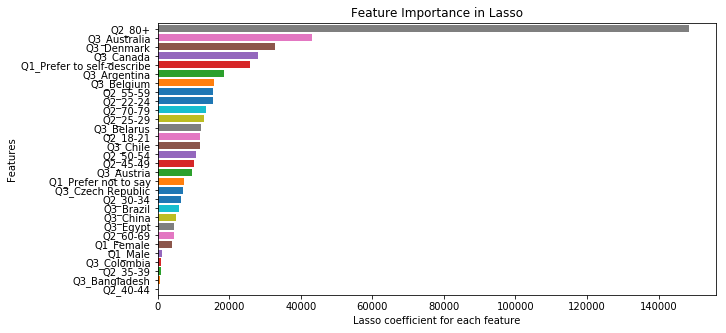

In [0]:
#I want to clearly show the question title, so I just select 30 important features
#for example, most of important features are age and location
f,ax=plt.subplots(1,1,figsize=(10,5))
pd.Series(abs(reg.coef_[:30]),emerge_x.columns[:30]).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Lasso')
plt.xlabel('Lasso coefficient for each feature')
plt.ylabel('Features')

## Model implementation

### PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

- pros:
    - It’s very efficient
    - The basis is hierarchical, ordered by relevance
    - It tends to perform quite well for most data sets
- cons:
    - If the data is strongly non-linear it may not work so well
    - Results are not always the best for visualization
    - Cannot diretly output which features are optimal.

In [0]:
#using PCA to reduce the features, due to the computation time, I will just assembly over 200 features into 50 groups
pca = PCA(n_components=50)
PCA_X = pca.fit_transform(x_entire_new)

#then split data again
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(PCA_X, target_y, test_size=0.3, random_state=42)

I do not know why the models fitting took a long running time.
Therefore, I only work out the linear regression.
However, the code is provided.

### linear regression

Linear regression is a common Statistical Data Analysis technique.  It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables. 

- pros: Linear regression is great when the relationship to between covariates and response variable is known to be linear. This is good as it shifts focus from statistical modeling and to data analysis and preprocessing.
- cons: Linear Regression over simplifies many real world problems. More often than not, covariates and response variables don’t exhibit a linear relationship.

In [0]:
model1 = LinearRegression()
model1.fit(x_train_new,y_train_new)
predictions1 = model1.predict(x_test_new)
Test_Score1 = r2_score(y_test_new, predictions1)
Test_Score1

### decision trees

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

- pros: interpretable; easily handle irrelevant atrributes; very compact
- cons: only axis-aligned split data; may not find best trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train_new,y_train_new)
predictions2 = model2.predict(x_test_new)
Test_Score2 = r2_score(y_test_new, predictions2)
Test_Score2

### KNN

In K means algorithm, for each test data point, we would be looking at the K nearest training data points and take the most frequently occurring classes and assign that class to the test data. 

- pros: No assumptions about data; Simple algorithm; High accuracy
- cons: Computationally expensive; High memory required; Sensitive to irrelevant features and the scale of the data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train_new,y_train_new)
predictions3 = model3.predict(x_test_new)
Test_Score3 = r2_score(y_test_new, predictions3)
Test_Score3

### random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

- pros:One of the most accurate decision models; Works well on large datasets.
- cons: Overfitting in case of noisy data; Unlike decision trees, results are difficult to interpret.

In [0]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train_new,y_train_new)
predictions4 = model4.predict(x_test_new)
Test_Score4 = r2_score(y_test_new, predictions4)
Test_Score4

In [0]:
test_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(y_test, predictions))
print("test RMSE:", test_root_mean_squared_error)

### 10-fold Cross Validation

In [0]:
#reference: I borrow the code from https://github.com/michael100824/MIE1624/blob/master/A2/Zhang_999857631_assignment2.ipynb
kfold = KFold(n_splits=10, random_state=42)
mean=[]
accuracy=[]
std=[]
classifiers=['Decision Tree','KNN', 'Linear Regression','Random Forest']
models=[DecisionTreeClassifier(),KNeighborsClassifier(),LinearRegression(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe=pd.DataFrame({'CV Mean':mean,'Std':std},index=classifiers)       
new_models_dataframe
#this dataframe can compare four methods, the standard deviation and the mean
#the model with lowest standard deviation should be used later

## Discussion

In conclusion, we can see the gender, age and location are very top features to be related to and predict the salary.
However, the accuary is not very good.
To improve the model accuracy
- select more components in the PCA processing
- change the question with value range to a specific number, for exmaple, the question with a work experience 10-20 years can be converted to 15 years, which is the mean
- delete the columns with too many unique answers

## Bonus

### Neural Network

In [0]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,8,4), random_state=1, max_iter=1000)
clf.fit(PCA_X, target_y)
clf.score(PCA_X, target_y)
clf.score(x_test_new, y_test_new)